Exercise 2, Problem 1

$\forall w, v \in \mathscr C, y \in \mathbb R_+, |Uw(y)-Uv(y)| =$  

$ \beta |\int w(f(y - \sigma(y))z) \phi(dz) - \int v(f(y - \sigma(y))z) \phi(dz) | = \beta|\int [w(f(y - \sigma(y))z)-v(f(y - \sigma(y))z)] \phi(dz)|$  

$\leq \beta |\int w(f(y - \sigma(y))z)-v(f(y - \sigma(y))z)||\phi(dz)| \leq \beta sup|w(y) - v(y)| = \beta \rho (w,v)$  

So $U$ is a contraction mapping with respect to the supremum distance.  

Since $U$ is a contraction map, maps $\mathscr{C}$ to itself, and $(\mathscr{C}, \rho)$, where $\rho$ represents the metric for the supremum distance between two bounded functions, forms a complete metric space, we know--by Banach's Fixed Point Theorem--that $U$ has a unique fixed point. To show that $v_{\sigma}$ is the unique fixed point, we only have to show that $U(v_{\sigma}) = v_{\sigma}$, which can be proved using the definition $v_{\sigma} = E(\sum_{t=0}^\infty \beta^t u (\sigma(y_t)))$.

Exercise 2, Problem 2

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
10           7.012e-01      1.301e+00         
20           4.656e-01      2.692e+00         
30           3.096e-01      4.010e+00         
40           2.058e-01      5.316e+00         
50           1.368e-01      6.667e+00         
60           9.097e-02      8.006e+00         
70           6.048e-02      9.366e+00         
80           4.021e-02      1.068e+01         
90           2.673e-02      1.201e+01         
100          1.777e-02      1.328e+01         
110          1.182e-02      1.456e+01         
120          7.856e-03      1.585e+01         
130          5.223e-03      1.713e+01         
140          3.472e-03      1.842e+01         
150          2.308e-03      1.970e+01         
160          1.535e-03      2.100e+01         
170          1.020e-03      2.229e+01         
180          6.784e-04      2.358e+01         
190          4.510e-04      2.487e+01         
200          2.

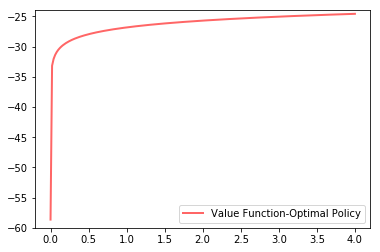

In [22]:
# Optimal policy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound
import quantecon
import scipy.stats

def bellman_operator(w, grid, beta, u, f, shocks, Tw=None, compute_policy=0):
    # === Apply linear interpolation to w === #
    w_func = lambda x: np.interp(x, grid, w)

    # == Initialize Tw if necessary == #
    if Tw is None:
        Tw = np.empty_like(w)

    if compute_policy:
        sigma = np.empty_like(w)

    # == set Tw[i] = max_c { u(c) + beta E w(f(y  - c) z)} == #
    for i, y in enumerate(grid):
        def objective(c):
            return - u(c) - beta * np.mean(w_func(f(y - c) * shocks))
        c_star = fminbound(objective, 1e-10, y)
        if compute_policy:
            sigma[i] = c_star
        Tw[i] = - objective(c_star)

    if compute_policy:
        return Tw, sigma
    else:
        return Tw

    
class LogLinearOG:
    def __init__(self, alpha=0.4, beta=0.96, mu=0, s=0.1):

        self.alpha, self.beta, self.mu, self.s = alpha, beta, mu, s 

        # == Some useful constants == #
        self.ab = alpha * beta
        self.c1 = np.log(1 - self.ab) / (1 - beta)
        self.c2 = (mu + alpha * np.log(self.ab)) / (1 - alpha)
        self.c3 = 1 / (1 - beta)
        self.c4 = 1 / (1 - self.ab)

    def u(self, c):
        " Utility "
        return np.log(c)

    def u_prime(self, c):
        return 1 / c

    def f(self, k):
        " Deterministic part of production function.  "
        return k**self.alpha

    def f_prime(self, k):
        return self.alpha * k**(self.alpha - 1)

    def c_star(self, y):
        " True optimal policy.  "
        return (1 - self.alpha * self.beta) * y

    def v_star(self, y):
        " True value function. "
        return self.c1 + self.c2 * (self.c3 - self.c4) + self.c4 * np.log(y)
    
lg = LogLinearOG()
# == Unpack parameters / functions for convenience == #
alpha, beta, mu, s = lg.alpha, lg.beta, lg.mu, lg.s

grid_max = 4         # Largest grid point
grid_size = 200      # Number of grid points
shock_size = 250     # Number of shock draws in Monte Carlo integral
grid = np.linspace(1e-5, grid_max, grid_size)
shocks = np.exp(mu + s * np.random.randn(shock_size))


from quantecon import compute_fixed_point
Tw = np.empty(len(grid))
initial_w = 5 * np.log(grid)

# Turn the Bellman operator into a function of one variable
T = lambda w: bellman_operator(w,
                               grid,
                               beta,
                               np.log,
                               lambda k: k**alpha,
                               shocks,
                               compute_policy=False)

v_star_approx = compute_fixed_point(T, initial_w,
                                    error_tol=1e-5,  # error_tol
                                    max_iter=500,   # max_iter
                                    verbose=2,  # verbose
                                    print_skip=10,     # print_skip
                                    method='iteration')
plt.ylim(-60, -24)
plt.plot(grid, v_star_approx, lw=2, alpha=0.6, color = 'r', label='Value Function-Optimal Policy')
plt.legend(loc='lower right')
plt.show()


Iteration    Distance       Elapsed (seconds)
---------------------------------------------
10           1.263e+00      6.172e-02         
20           7.740e-01      1.114e-01         
30           5.061e-01      1.624e-01         
40           3.354e-01      2.166e-01         
50           2.228e-01      2.770e-01         
60           1.481e-01      3.264e-01         
70           9.847e-02      3.750e-01         
80           6.547e-02      4.278e-01         
90           4.352e-02      4.877e-01         
100          2.894e-02      5.416e-01         
110          1.924e-02      5.953e-01         
120          1.279e-02      6.571e-01         
130          8.503e-03      7.249e-01         
140          5.653e-03      7.878e-01         
150          3.758e-03      8.437e-01         
160          2.499e-03      9.057e-01         
170          1.661e-03      9.674e-01         
180          1.104e-03      1.026e+00         
190          7.343e-04      1.074e+00         
200          4.

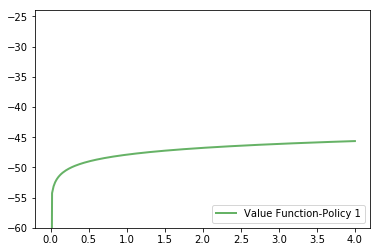

In [23]:
# Policy 1
def bellman_operator(w, grid, beta, u, f, shocks, Tw=None, compute_policy=0):
    # === Apply linear interpolation to w === #
    w_func = lambda x: np.interp(x, grid, w)

    # == Initialize Tw if necessary == #
    if Tw is None:
        Tw = np.empty_like(w)

    if compute_policy:
        sigma = np.empty_like(w)

    # == set Tw[i] = max_c { u(c) + beta E w(f(y  - c) z)} == #
    for i, y in enumerate(grid):
        def objective(c):
            return - u(c) - beta * np.mean(w_func(f(y - c) * shocks))
        c_star = 0.95 * y
        if compute_policy:
            sigma[i] = c_star
        Tw[i] = - objective(c_star)

    if compute_policy:
        return Tw, sigma
    else:
        return Tw

    
class LogLinearOG:
    def __init__(self, alpha=0.4, beta=0.96, mu=0, s=0.1):

        self.alpha, self.beta, self.mu, self.s = alpha, beta, mu, s 

        # == Some useful constants == #
        self.ab = alpha * beta
        self.c1 = np.log(1 - self.ab) / (1 - beta)
        self.c2 = (mu + alpha * np.log(self.ab)) / (1 - alpha)
        self.c3 = 1 / (1 - beta)
        self.c4 = 1 / (1 - self.ab)

    def u(self, c):
        " Utility "
        return np.log(c)

    def u_prime(self, c):
        return 1 / c

    def f(self, k):
        " Deterministic part of production function.  "
        return k**self.alpha

    def f_prime(self, k):
        return self.alpha * k**(self.alpha - 1)

    def c_star(self, y):
        " True optimal policy.  "
        return (1 - self.alpha * self.beta) * y

    def v_star(self, y):
        " True value function. "
        return self.c1 + self.c2 * (self.c3 - self.c4) + self.c4 * np.log(y)
    
lg = LogLinearOG()
# == Unpack parameters / functions for convenience == #
alpha, beta, mu, s = lg.alpha, lg.beta, lg.mu, lg.s

grid_max = 4         # Largest grid point
grid_size = 200      # Number of grid points
shock_size = 250     # Number of shock draws in Monte Carlo integral
grid = np.linspace(1e-5, grid_max, grid_size)
shocks = np.exp(mu + s * np.random.randn(shock_size))


from quantecon import compute_fixed_point
Tw = np.empty(len(grid))
initial_w = 5 * np.log(grid)

# Turn the Bellman operator into a function of one variable
T = lambda w: bellman_operator(w,
                               grid,
                               beta,
                               np.log,
                               lambda k: k**alpha,
                               shocks,
                               compute_policy=False)

v_star_approx = compute_fixed_point(T, initial_w,
                                    error_tol=1e-5,  # error_tol
                                    max_iter=500,   # max_iter
                                    verbose=2,  # verbose
                                    print_skip=10,     # print_skip
                                    method='iteration')
plt.ylim(-60, -24)
plt.plot(grid, v_star_approx, lw=2, alpha=0.6, color = 'g', label='Value Function-Policy 1')
plt.legend(loc='lower right')
plt.show()


Iteration    Distance       Elapsed (seconds)
---------------------------------------------
10           1.215e+00      3.076e-01         
20           5.748e-01      6.094e-01         
30           3.820e-01      9.165e-01         
40           2.540e-01      1.222e+00         
50           1.688e-01      1.540e+00         
60           1.123e-01      1.863e+00         
70           7.463e-02      2.176e+00         
80           4.962e-02      2.491e+00         
90           3.299e-02      2.837e+00         
100          2.193e-02      3.158e+00         
110          1.458e-02      3.538e+00         
120          9.693e-03      3.852e+00         
130          6.444e-03      4.162e+00         
140          4.285e-03      4.468e+00         
150          2.848e-03      4.776e+00         
160          1.894e-03      5.108e+00         
170          1.259e-03      5.454e+00         
180          8.370e-04      5.806e+00         
190          5.565e-04      6.141e+00         
200          3.

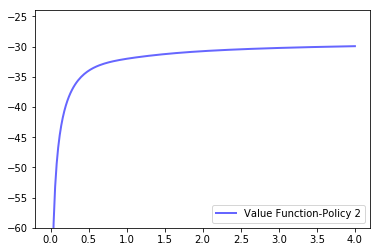

In [24]:
# Policy 2
def bellman_operator(w, grid, beta, u, f, shocks, Tw=None, compute_policy=0):
    # === Apply linear interpolation to w === #
    w_func = lambda x: np.interp(x, grid, w)

    # == Initialize Tw if necessary == #
    if Tw is None:
        Tw = np.empty_like(w)

    if compute_policy:
        sigma = np.empty_like(w)

    # == set Tw[i] = max_c { u(c) + beta E w(f(y  - c) z)} == #
    for i, y in enumerate(grid):
        def objective(c):
            return - u(c) - beta * np.mean(w_func(f(y - c) * shocks))
        c_star = scipy.stats.lognorm.cdf(y, 0.5)
        if compute_policy:
            sigma[i] = c_star
        Tw[i] = - objective(c_star)

    if compute_policy:
        return Tw, sigma
    else:
        return Tw

    
class LogLinearOG:
    def __init__(self, alpha=0.4, beta=0.96, mu=0, s=0.1):

        self.alpha, self.beta, self.mu, self.s = alpha, beta, mu, s 

        # == Some useful constants == #
        self.ab = alpha * beta
        self.c1 = np.log(1 - self.ab) / (1 - beta)
        self.c2 = (mu + alpha * np.log(self.ab)) / (1 - alpha)
        self.c3 = 1 / (1 - beta)
        self.c4 = 1 / (1 - self.ab)

    def u(self, c):
        " Utility "
        return np.log(c)

    def u_prime(self, c):
        return 1 / c

    def f(self, k):
        " Deterministic part of production function.  "
        return k**self.alpha

    def f_prime(self, k):
        return self.alpha * k**(self.alpha - 1)

    def c_star(self, y):
        " True optimal policy.  "
        return (1 - self.alpha * self.beta) * y

    def v_star(self, y):
        " True value function. "
        return self.c1 + self.c2 * (self.c3 - self.c4) + self.c4 * np.log(y)
    
lg = LogLinearOG()
# == Unpack parameters / functions for convenience == #
alpha, beta, mu, s = lg.alpha, lg.beta, lg.mu, lg.s

grid_max = 4         # Largest grid point
grid_size = 200      # Number of grid points
shock_size = 250     # Number of shock draws in Monte Carlo integral
grid = np.linspace(1e-5, grid_max, grid_size)
shocks = np.exp(mu + s * np.random.randn(shock_size))


from quantecon import compute_fixed_point
Tw = np.empty(len(grid))
initial_w = 5 * np.log(grid)

# Turn the Bellman operator into a function of one variable
T = lambda w: bellman_operator(w,
                               grid,
                               beta,
                               np.log,
                               lambda k: k**alpha,
                               shocks,
                               compute_policy=False)

v_star_approx = compute_fixed_point(T, initial_w,
                                    error_tol=1e-5,  # error_tol
                                    max_iter=500,   # max_iter
                                    verbose=2,  # verbose
                                    print_skip=10,     # print_skip
                                    method='iteration')
plt.ylim(-60, -24)
plt.plot(grid, v_star_approx, lw=2, alpha=0.6, color = 'b', label='Value Function-Policy 2')
plt.legend(loc='lower right')
plt.show()

Based on the three plots, we see that the value functions associated with policy 1 and 2 are both below the value function for the optimal policy, at all points on the grid. This shows that policy 1 and 2 are not greedy policies associated with the value function, and are not optimal. 